In [5]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# Red neuronal secuencial
from tensorflow.keras.models import Sequential
# Capa completamente conectada
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D
# Optimizador
from tensorflow.keras.optimizers import Adam

In [6]:
# asegurar que los resultados sean "reproducibles"
import tensorflow as tf

np.random.seed(1234)
tf.random.set_seed(1234)

In [7]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

In [8]:
def mostrar_num(in_data):
    """Genera un gráfico que muestra un registro
    del set de datos.
    Para ello, convierte el array de 1 dimensión en
    una matriz de 28x28.
    """
    matriz = np.array(in_data.values)
    plt.imshow(matriz.reshape(28, 28))

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: 200, dtype: int64


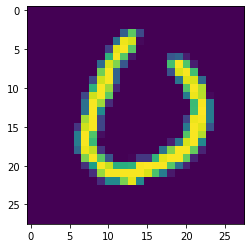

In [9]:
registro = 200
print(y_train.iloc[registro])
mostrar_num(X_train.iloc[registro])

In [10]:
print(X_train.shape)

(7500, 784)


In [11]:
# Crear red neuronal 
nn_squencial = Sequential([
    layers.Input(784),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

2022-08-31 19:17:40.196783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
nn_squencial.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

In [13]:
historial = nn_squencial.fit(
    X_train.values,
    y_train.values,
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
211/211 [==============================] - 1s 3ms/step - loss: 12.9076 - accuracy: 0.5465 - val_loss: 0.8292 - val_accuracy: 0.6707
Epoch 2/10
211/211 [==============================] - 1s 3ms/step - loss: 0.7164 - accuracy: 0.7830 - val_loss: 0.7526 - val_accuracy: 0.7987
Epoch 3/10
211/211 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.8274 - val_loss: 0.5918 - val_accuracy: 0.8507
Epoch 4/10
211/211 [==============================] - 0s 2ms/step - loss: 0.5264 - accuracy: 0.8572 - val_loss: 0.6426 - val_accuracy: 0.8453
Epoch 5/10
211/211 [==============================] - 1s 2ms/step - loss: 0.5242 - accuracy: 0.8578 - val_loss: 0.6182 - val_accuracy: 0.8200
Epoch 6/10
211/211 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.8576 - val_loss: 0.5141 - val_accuracy: 0.8640
Epoch 7/10
211/211 [==============================] - 1s 2ms/step - loss: 0.4817 - accuracy: 0.8662 - val_loss: 0.5797 - val_accuracy: 0.8520
Epoch

# Redes neuronales convolucionales

![cnn1](cnn.png)

In [14]:
conv_nn = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)


In [15]:
conv_nn.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

In [16]:
new_x_train = X_train.values.reshape(-1, 28, 28)

In [17]:
conv_nn.fit(
    new_x_train,
    y_train,
    batch_size=128,
    epochs=10, validation_split=0.1
)

Epoch 1/10
53/53 [==============================] - 2s 36ms/step - loss: 8.2392 - accuracy: 0.5009 - val_loss: 0.4525 - val_accuracy: 0.8520
Epoch 2/10
53/53 [==============================] - 2s 33ms/step - loss: 0.7273 - accuracy: 0.7616 - val_loss: 0.2607 - val_accuracy: 0.9147
Epoch 3/10
53/53 [==============================] - 2s 32ms/step - loss: 0.5630 - accuracy: 0.8193 - val_loss: 0.1914 - val_accuracy: 0.9307
Epoch 4/10
53/53 [==============================] - 2s 31ms/step - loss: 0.5166 - accuracy: 0.8310 - val_loss: 0.1748 - val_accuracy: 0.9467
Epoch 5/10
53/53 [==============================] - 1s 28ms/step - loss: 0.4482 - accuracy: 0.8587 - val_loss: 0.1677 - val_accuracy: 0.9587
Epoch 6/10
53/53 [==============================] - 1s 28ms/step - loss: 0.4265 - accuracy: 0.8676 - val_loss: 0.1161 - val_accuracy: 0.9600
Epoch 7/10
53/53 [==============================] - 1s 27ms/step - loss: 0.4224 - accuracy: 0.8668 - val_loss: 0.1290 - val_accuracy: 0.9613
Epoch 8/10
53

In [18]:
conv_nn.save('conv_nn.h5')